In [1]:
import math
import time
import random 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from statistics import stdev

In [2]:
def partialcorr(X,Y,Z):
    xy = np.corrcoef(X,Y)[0,1]
    xz = np.corrcoef(X,Z)[0,1]
    yz = np.corrcoef(Y,Z)[0,1]
    
    return (xy-xz*yz)/(math.sqrt(1-xz**2)*math.sqrt(1-yz**2))

# データ作成

In [3]:
def make_data(L,m,byx,byz,bzx):
    x = np.empty((m,L))
    y = np.empty((m,L))
    z = np.empty((m,L))
    
    x0=np.linspace(0.1,0.8,m)
    y0=np.linspace(0.1,0.8,m)
    z0=np.linspace(0.1,0.8,m)
#     d=0.1
#     x0=np.arange(d,1,d)
#     y0=np.arange(d,1,d)
#     z0=np.arange(d,1,d)
    #NN = np.empty((E,L,N))
    for i in range(m):
#         x[i,0]=0.4
#         y[i,0]=0.4
#         z[i,0]=0.4
        x[i,0]=x0[i]
        y[i,0]=y0[i]
        z[i,0]=z0[i]
    
    for i in range(m):
        for j in range(L-1):
            x[i,j+1]=x[i,j]*(rx-rx*x[i,j])#+np.random.normal(0,0.005)
            y[i,j+1]=y[i,j]*(ry-ry*y[i,j]-byx*x[i,j]-byz*z[i,j])
            z[i,j+1]=z[i,j]*(rz-rz*z[i,j]-bzx*x[i,j])#+np.random.normal(0,0.005)

#     G = np.array([x,y,z])
    return x,y,z

# Simplex projection(Simplex法)

In [4]:
def simplex(x,y,z,maxE,L,m):
#     maxE=5
    matE_X=[]
    matE_Y=[]
    matE_Z=[]
    cX=[]
    cY=[]
    cZ=[]

    for a in range(1,maxE):
        E=a+1

        x1=x[:,E:]
        y1=y[:,E:]
        z1=z[:,E:]
        X_=np.reshape(x1,np.size(x1))
        Y_=np.reshape(y1,np.size(y1))
        Z_=np.reshape(z1,np.size(z1))
        X=[]
        Y=[]
        Z=[]

        for i in range(m):
        #     x1=[]
        #     x1=[]
            for j in range(E-1,L-1):
                x1=[]
                y1=[]
                z1=[]
                for k in range(E):
                    x1.append(x[i,j-k])
                    y1.append(y[i,j-k])
                    z1.append(z[i,j-k])
                X.append(x1)
                Y.append(y1)
                Z.append(z1)
        X=np.reshape(X,(int(np.size(X)/(E)),E))
        Y=np.reshape(Y,(int(np.size(Y)/(E)),E))
        Z=np.reshape(Z,(int(np.size(Z)/(E)),E))
#         print(Y)
        nei=E+1
#         nn=nei+30
        neighX = NearestNeighbors(n_neighbors=nei+1, algorithm='ball_tree').fit(X)
        neighY = NearestNeighbors(n_neighbors=nei+1, algorithm='ball_tree').fit(Y)
        neighZ = NearestNeighbors(n_neighbors=nei+1, algorithm='ball_tree').fit(Z)
        X1=[]
        Y1=[]
        Z1=[]
        for i in range(len(X)):
            disX, indX = neighX.kneighbors([X[i]])
            disY, indY = neighY.kneighbors([Y[i]])
            disZ, indZ = neighZ.kneighbors([Z[i]])
            disX=disX[0]
            disY=disY[0]
            disZ=disZ[0]
            indX=indX[0]
            indY=indY[0]
            indZ=indZ[0]

#             for k in range(nn-1):
#                 if disX[nn-1-k]==0:
#                     disX=np.delete(disX,(nn-1-k))
#                     indX=np.delete(indX,(nn-1-k))
#                     disX=np.reshape(disX,(len(disX)))
#                     indX=np.reshape(indX,(len(indX)))
#                 if disY[nn-1-k]==0:
#                     disY=np.delete(disY,(nn-1-k))
#                     indY=np.delete(indY,(nn-1-k))
#                     disY=np.reshape(disY,(len(disY)))
#                     indY=np.reshape(indY,(len(indY)))
#                 if disZ[nn-1-k]==0:
#                     disZ=np.delete(disZ,(nn-1-k))
#                     indZ=np.delete(indZ,(nn-1-k))
#                     disZ=np.reshape(disZ,(len(disZ)))
#                     indZ=np.reshape(indZ,(len(indZ)))

            UX=np.zeros(nei)
            UY=np.zeros(nei)
            UZ=np.zeros(nei)
            sumUX=0
            sumUY=0
            sumUZ=0

            for j in range(nei):
                if disX[j+1]==0:
                    disX[j+1]=0.0001
                if disY[j+1]==0:
                    disY[j+1]=0.0001
                if disZ[j+1]==0:
                    disZ[j+1]=0.0001
                #sumU+=(td_x[ind[0,0]]*dis[0,0]+td_x[ind[0,1]]*dis[0,1]+td_x[ind[0,2]]*dis[0,2])/(dis[0,1]+dis[0,2]+dis[0,0])
                UX[j]=np.exp(-disX[j+1]/disX[1])
                UY[j]=np.exp(-disY[j+1]/disY[1])
                UZ[j]=np.exp(-disZ[j+1]/disZ[1])
                sumUX+=UX[j]
                sumUY+=UY[j]
                sumUZ+=UZ[j]
            sumYX=0
            sumYY=0
            sumYZ=0
            for j in range(nei):
                sumYX+=(UX[j]/sumUX)*X_[indX[j+1]]
                sumYY+=(UY[j]/sumUY)*Y_[indY[j+1]]
                sumYZ+=(UZ[j]/sumUZ)*Z_[indZ[j+1]]
            X1.append(sumYX)
            Y1.append(sumYY)
            Z1.append(sumYZ)
    # X=X.T
    # Y=Y.T
    # Z=Z.T
    #     print(mean_absolute_error(X1,X_))
        cX.append(np.corrcoef(X1,X_)[0,1])
    #     print(mean_absolute_error(Y1,Y_))
        cY.append(np.corrcoef(Y1,Y_)[0,1])
    #     print(mean_absolute_error(Z1,Z_))
        cZ.append(np.corrcoef(Z1,Z_)[0,1])
#         print(a)

#     print(cX)
#     print(cY)
#     print(cZ)
    E_X=int(np.argmax(cX)+2)
    E_Y=int(np.argmax(cY)+2)
    E_Z=int(np.argmax(cZ)+2)
    E=E_X,E_Y,E_Z
#     print(E)
    #     x1=x[:,E-1:]
    #     y1=y[:,E-1:]
    #     z1=z[:,E-1:]
    #     X_=np.reshape(x1,np.size(x1))
    #     Y_=np.reshape(y1,np.size(y1))
    #     Z_=np.reshape(z1,np.size(z1))
    return E_X,E_Y,E_Z

In [5]:
def boot(x,y,z,E,tau,iteration=100):
#     Accm=np.insert(x,0,0,axis=1)  #0入れる
#     Accm=np.reshape(Accm,np.size(Accm))
#     Bccm=np.insert(y,0,0,axis=1)  #0入れる
#     Bccm=np.reshape(Bccm,np.size(Bccm))
#     A=np.reshape(Accm,np.size(Accm))
#     B=np.reshape(Bccm,np.size(Bccm))
    A=np.reshape(x,np.size(x))
    B=np.reshape(y,np.size(y))
    C=np.reshape(z,np.size(z))
#     acceptablelib=A[:,tau*(E-1):]
#     print(a)
    a=np.arange(m*(L))  #!is.nan
    a=np.reshape(a,(m,L))
    a=a[:,tau*(E-1):]
    a=np.reshape(a,np.size(a))
    acceptablelib=[i for i in a if i<np.size(x)]
#     a=np.arange(m*(L))  #!is.nan
#     a=np.reshape(a,(m,L))
#     a=a[:,tau*(E-1):]
#     a=np.reshape(a,np.size(a))
#     acceptablelib=[i for i in a if i<np.size(x)]
    
    acceptablelib=np.reshape(acceptablelib,np.size(acceptablelib))
#     print(acceptablelib)
    a=np.reshape(a,np.size(a))
#     A=np.reshape(x,np.size(x))
#     B=np.reshape(y,np.size(y))
#     print(len(A))
    plengtht=np.size(x)
    pLibLength=np.size(x)
    Aest=np.zeros(len(A))
    Cest=np.zeros(len(A))
    AAest=np.zeros(len(A))
    rho=np.zeros(len(A))
    rhoD=np.zeros(len(A))
    
    X=[]
    Y=[]
    for i in acceptablelib:
        X_e=[]
        Y_e=[]
        for j in range(E):
#             X_e.append(Accm[i-tau*(E-j)])
#             Y_e.append(Bccm[i-tau*(E-j)])
            X_e.append(A[i-tau*j])
            Y_e.append(B[i-tau*j])            
        X.append(X_e)
        Y.append(Y_e)
    X=np.reshape(X,(int(np.size(X)/(E)),E))
    Y=np.reshape(Y,(int(np.size(Y)/(E)),E))
#     print("A_len",len(A))
#     print("a_len",len(a))
#     print("Y_len",len(Y))
    
    nei=E+1
    
#     print("A",A)
#     print([Accm[i] for i in acceptablelib])
#     X=[]
#     Y=[]
    
#     #時間遅れベクトルの作成
#     for i in range(m):
#         for j in range((E-1)*tau,L):
#             x1=[]
#             y1=[]
#             for k in range(E):
#                 x1.append(x[i,j-k])
#                 y1.append(y[i,j-k])
#             X.append(x1)
#             Y.append(y1)
#     X=np.reshape(X,(int(np.size(X)/(E)),E))
#     Y=np.reshape(Y,(int(np.size(Y)/(E)),E))

#     random.seed(100)
#     iteration = 10 #ブートの回数
    acceptablelib2=acceptablelib[acceptablelib<((plengtht-1)-(tau))]
#     print(acceptablelib2)
#     DesiredL=np.arange(tau*(E-1)+(E+1),np.size(a)-(E-2)+1)
    DesiredL=np.arange(tau*(E-1)+(E+1),len(A)-(E-2)+1)
    DesiredL+=E-2+1
#     print(len(A),DesiredL)
    for i in range(len(DesiredL)):
        DesiredL[i]=acceptablelib2[np.argmin(abs(acceptablelib2-DesiredL[i]))]
#     print(abs(acceptablelib2-DesiredL[i]))
#     print(acceptablelib2)
#     print(DesiredL)
    DesiredL=np.unique(DesiredL)
#     print("DesiredL",DesiredL)
#     print("acceptablelib",acceptablelib)
    lengtht=plengtht
    LibLen=pLibLength
    lenacceptablelib=len(acceptablelib)
#     print(lenacceptablelib)
#     Aest=np.zeros(len(X))
#     rho=Aest
#     varrho=Aest
    out_tmp=0
#     acceptablelib
#     DesiredL+=E-2
    Aest_mat=[]
    rho_mat=[]
    rhoD_mat=[]
#     lpos=np.arange(5,lengtht+5,5)
#     if lpos[len(lpos)-1]!=lengtht:
#         lpos=np.append(lpos,lengtht)
    
    #rhosq_mat=[]
    
#     lpos=[]
#     LibUse=np.arange(20)
    
#     LibUse=np.zeros(LibLen)
#     LibUse=LibUse.astype(int)
#     DesiredL=[5,10,15,20]
#     print("LibUse",LibUse)
#     print("DesiredL",DesiredL)
#     print("LibUse",LibUse)
#     print(len(B),"Bccm:",B)

    DesiredL=[DesiredL[0],DesiredL[-1]]

    for itlst in range(iteration):  #boot回数
        random.seed(itlst)
        # bootstrap.c
        
        from_=tau*(E-1)  #スタート地点
        dis=np.zeros(LibLen)
        LibUse=np.zeros(LibLen)
        LibUse=LibUse.astype(int)
        neighbors=np.zeros(E+1)
        neighbors=neighbors.astype(int)
        lpos=[]
        for l in DesiredL:  #時系列長を増やすlen(DesiredL)
#             random.seed(itlst*l*10)
#         for l in range(5):
#             print(l)
            if(l<(from_+E+1)):
                l=from_+E+1
            elif(l>=lengtht):
                l=lengtht-1
            to=l
#             print("from",from_,"to",to)

#             integerpos=math.floor(random.random()*(len(X)))
#             integerpos=math.floor(len(X))
#             count=acceptablelib[random.randint(0,len(acceptablelib)-1)]
#             count=len(A)-1
            Y_rand=[]
            Y_rand_ind=[]
            for i in range(l):
#                 count=acceptablelib[random.randint(0,lenacceptablelib-1)]
                count=random.randint(0,lenacceptablelib-1)
#                 LibUse[i]=count
                Y_rand.append(Y[count])
                Y_rand_ind.append(count)
                # integerpos=math.floor(random.random()*(len(X)))
    #             integerpos=math.floor(len(X))
                
#                 counnt=len(A)-1
#             LibUse=np.arange(20)
#             print("LibUse:",LibUse[0],LibUse)
#             print("randint",Y_rand_ind)
            leng=min(nei+1,i)
#             print(i,leng)
            Y_rand=np.reshape(Y_rand,(int(np.size(Y_rand)/E),E))
            neigh = NearestNeighbors(n_neighbors=nei+2, algorithm='ball_tree').fit(Y_rand[:l])
    
            for i in range(lenacceptablelib): #(acceptablelib)
                ac=acceptablelib[i]
#                 i=acceptablelib[i_]
#                 for j in range(from_,to):
# #                     print("j",j)
#                     dis[LibUse[j]]=0
#                     for k in range(E):
#     #                     print(dis[int(LibUse[j])],Y[i-tau*k]-Y[int(LibUse[j]-tau*k)])
# #                         print(int(LibUse[j]),dis[int(LibUse[j])])
# #                         print(Y[i-tau*k],Y[int(LibUse[j]-tau*k)])
#                         dis[LibUse[j]]=dis[LibUse[j]]+pow((B[i-tau*k]-B[LibUse[j]-tau*k]),2) #(Y[i-tau*k]-Y[Lib[j]-tau*k])**2
# #                     print("i:",i,"j",j,"Lib:",LibUse[j],"B:",B[j],"B_Lib:",B[LibUse[j]])
#                     dis[LibUse[j]]=np.sqrt(dis[LibUse[j]])
# #                     print(LibUse[j],dis[LibUse[j]])
# #                 print("dis:",dis)

#                 #getorder
#                 nneigh=1
#                 n=0
#                 if(LibUse[from_]==i):
#                     n=1
#                 neighbors[0]=LibUse[from_+n]
                
                dis,ind=neigh.kneighbors([Y[i]]) 
                if dis[0,0]==0:
                    dis=dis[0,1:]
                    ind=ind[0,1:]
                else:
                    dis=dis[0]
                    ind=ind[0]
                
#                 nneigh=[]
#                 n=0
#                 for i in range(nei):
#                     while(i==len(nneigh)):
#                         if ind[i+n]!=ac or leng==nei+n:
#                             nneigh.append(i+n)
#                         else:
#                             n+=1
#                 dis=dis[nneigh]
#                 ind=ind[nneigh]

#                 for ii in range(from_+n,to):
#                     neigh = NearestNeighbors(n_neighbors=nei, algorithm='ball_tree').fit(Y_rand)
#                     dis,index=neigh.kneighbors([Y[i]])
#                     print(l,i,ii)
#                     print("ii",ii)
#                     trip=0
#                     for j in range(nneigh):
# #                         print(neighbors[k])
# #                         print(dis[0])
# #                         print(dis[LibUse[j]])
#                         if ((dis[LibUse[ii]]<dis[neighbors[j]]) and (LibUse[ii]!=i)):
#                             for k in reversed(range(j,nneigh+1)):
#                                 if(k<(E+1)):
#                                     neighbors[k]=neighbors[k-1]
#                             neighbors[j]=LibUse[ii]
#                             if ((nneigh<(E+1))and(trip!=0)):
#                                 nneigh+=1
#                             trip=1
#                             break
#                     if (trip==0) and (nneigh<(E+1)) and (LibUse[ii]!=i) and (neighbors[nneigh-1]!=LibUse[ii]):
#                         neighbors[nneigh]=LibUse[ii]
#                         if(nneigh<(E+1)):
#                             nneigh+=1
                    
                        
                #end getorder
#                 print(l,i)
#                 print("neighbors:",index)
#                 print("dis:",dis)
#                 print("nneigh",nneigh)

                distsv=dis[0]
#                 print("distsv:",distsv)
                sumaest=0
                sumu=0
                sumw=0
                w=np.zeros(E+1)
                if distsv!=0:
                    u=np.zeros(E+1)
                    for j in range(nei):
                        u[j]=np.exp(-dis[j]/distsv)
#                     sumu=sum(u)
#                     print("sumu",sumu)
                    w=u/sum(u)                
                    for j in range(nei):
                        if w[j]<0.0001:
                            w[j]=0.0001
                    w=w/sum(w) 
                    for j in range(nei):
#                         print(len(X_),nneigh,(len(A)))
#                         print(j,index[j],Y_rand_ind)
                        sumaest+=A[a[Y_rand_ind[ind[j]]]]*w[j]
#                         print("A:",A[neighbors[j]],"w:",w[j])
                else:
                    for j in range(nei):
                        if dis[j]==0:
                            w[j]=1
                        else:
                            w[j]=0.0001
                    w=w/sum(w)
    #                 for j in range(nneigh):
    #                     s
                    for j in range(nei):
                        sumaest+=A[a[Y_rand_ind[ind[j+1]]]]*w[j]
                Aest[ac]=sumaest
#             print("Aest:",Aest)
            #get rho
#             print(len(A))
#             print(A[0])
#             print(type(A[0]))
#             print(len(Aest))
#             print(Aest[0])
#             print(type(Aest[0]))
#             print((Aest))
#             xbar=0
#             ybar=0
#             rhocalc=0
#             xybar=0
#             xxbarsq=0
#             yybarsq=0
#             for j in acceptablelib:
# #                 if itlst==1:
# #                     print(j,len(Aest))
#                 xbar+=A[j]
#                 ybar+=Aest[j]
#             xbar=xbar/lenacceptablelib
#             ybar=ybar/lenacceptablelib
            
#             for j in acceptablelib:
#                 xybar+=((A[j]-xbar)*(Aest[j]-ybar))
#                 xxbarsq+=pow(A[j]-xbar,2)
#                 yybarsq+=pow(Aest[j]-ybar,2)
#             rhocalc=xybar/(np.sqrt(xxbarsq)*np.sqrt(yybarsq))
#             if ((rhocalc>=-1)and(rhocalc<=1)):
#                 rho[l]+=rhocalc
#             print(Aest)
#             print(len(a),len(Aest))
#             print()
#             A_=[A[j] for j in acceptablelib]
#             Aest_=[Aest[j] for j in acceptablelib]
#             print("rand",Y_rand_ind)
            
            for i in range(lenacceptablelib): #(acceptablelib)
                ac=acceptablelib[i]
                dis,ind=neigh.kneighbors([Y[i]]) 
                if dis[0,0]==0:
                    dis=dis[0,1:]
                    ind=ind[0,1:]
                else:
                    dis=dis[0]
                    ind=ind[0]
                
                distsv=dis[0]
#                 print("distsv:",distsv)
                sumaest=0
                sumu=0
                sumw=0
                w=np.zeros(E+1)
                if distsv!=0:
                    u=np.zeros(E+1)
                    for j in range(nei):
                        u[j]=np.exp(-dis[j]/distsv)
#                     sumu=sum(u)
#                     print("sumu",sumu)
                    w=u/sum(u)                
                    for j in range(nei):
                        if w[j]<0.0001:
                            w[j]=0.0001
                    w=w/sum(w) 
                    for j in range(nei):
#                         print(len(X_),nneigh,(len(A)))
#                         print(j,index[j],Y_rand_ind)
                        sumaest+=C[a[Y_rand_ind[ind[j]]]]*w[j]
#                         print("A:",A[neighbors[j]],"w:",w[j])
                else:
                    for j in range(nei):
                        if dis[j]==0:
                            w[j]=1
                        else:
                            w[j]=0.0001
                    w=w/sum(w)
    #                 for j in range(nneigh):
    #                     s
                    for j in range(nei):
                        sumaest+=C[a[Y_rand_ind[ind[j+1]]]]*w[j]
                Cest[ac]=sumaest
#                 if l==DesiredL[-1]:
#                     print(C[ac],sumaest)
            
            Z=[]
            for i in acceptablelib:
                Z_e=[]
                for j in range(E):
                    Z_e.append(Cest[i-tau*j])       
                Z.append(Z_e)
            Z=np.reshape(Z,(int(np.size(Z)/(E)),E))
#             if l==DesiredL[-1]:
# #                 print(Cest[acceptablelib])
# #                 print("Z",Z)
#                 plt.scatter(Z[:,0],Z[:,1])
#                 plt.scatter(C[acceptablelib],C[acceptablelib-1])
#                 plt.show()
            neigh=NearestNeighbors(n_neighbors=nei+2, algorithm='ball_tree').fit(Z[:l])
            for i in range(lenacceptablelib):
                ac=acceptablelib[i]
                dis,ind=neigh.kneighbors([Z[i]]) 
                if dis[0,0]==0:
                    dis=dis[0,1:]
                    ind=ind[0,1:]
                else:
                    dis=dis[0]
                    ind=ind[0]
                
                distsv=dis[0]
#                 print("distsv:",distsv)
                sumaest=0
                sumu=0
                sumw=0
                w=np.zeros(E+1)
                if distsv!=0:
                    u=np.zeros(E+1)
                    for j in range(nei):
                        u[j]=np.exp(-dis[j]/distsv)
#                     sumu=sum(u)
#                     print("sumu",sumu)
                    w=u/sum(u)                
                    for j in range(nei):
                        if w[j]<0.0001:
                            w[j]=0.0001
                    w=w/sum(w) 
                    for j in range(nei):
#                         print(len(X_),nneigh,(len(A)))
#                         print(j,index[j],Y_rand_ind)
                        sumaest+=A[a[ind[j]]]*w[j]
#                         print("A:",A[neighbors[j]],"w:",w[j])
                else:
                    for j in range(nei):
                        if dis[j+1]==0:
                            w[j]=1
                        else:
                            w[j]=0.0001
                    w=w/sum(w)
    #                 for j in range(nneigh):
    #                     s
                    for j in range(nei):
                        sumaest+=A[a[ind[j+1]]]*w[j]
#                 print(sumaest,type(sumaest),type(AAest[ac]))
                AAest[ac]=sumaest
            
#             A_=A[acceptablelib]
#             Aest_=Aest[acceptablelib]
#             AAest_=AAest[acceptablelib]
            rho[l]=np.corrcoef(A[acceptablelib],Aest[acceptablelib])[1,0]
            rhoD[l]=partialcorr(A[acceptablelib],Aest[acceptablelib],AAest[acceptablelib])
#             print("rho",rho[l])
            #end boot.c
            lpos.append(l)
#         Aest_=[Aest[i] for  i in range(len(Aest)) if Aest[i]!=0]
#         rho_=[rho[i] for i in range(len(rho)) if rho[i]!=0]
#         Lobs=[rho[i] for i in range(len(A)-E+1) if rho[i]!=0]
#             print(,len(rho),len(Lobs))
#         lpos=sorted(Lobs)
#         ar=[A[acceptablelib],Aest[acceptablelib],AAest[acceptablelib]]
#         ar=np.reshape(ar,(3,np.size(ar)//3)).T
#         print(ar)
        Aest_mat.append(Aest.copy())
#         print(Aest)
#         print("rho",rho)
        rho_mat.append(rho.copy())
        rhoD_mat.append(rhoD.copy())
#         print(itlst,"r_mat",rho_mat)
#         print(itlst)
#         print(Aest)
#         print(rho)
#     print(rho_mat,len(rho,mat))
#     print(np.size(Aest_mat),np.size(rho_mat),np.size(Lobs))
    Aest_mat=np.reshape(Aest_mat,(iteration,int(np.size(Aest_mat)/iteration))).T
    rho_mat=np.reshape(rho_mat,(iteration,int(np.size(rho_mat)/iteration))).T
    rhoD_mat=np.reshape(rhoD_mat,(iteration,int(np.size(rhoD_mat)/iteration))).T
    
#     np.set_printoptions(threshold=np.inf)
#     print("rho_mat",rho_mat[:5])
    
#     lpos=[i-E+1 for i in range(len(A)) if rho[i]!=0]
#     # 1. Lobs=(1:length(A))[out$rho!=0]-E+1
#     Lobs = np.array(range(1, len(A)+1))[np.array(out['rho'])!=0] - E + 1

#     # 2. lpos=sort(unique(c(lpos, out_tmp[[itlst]]$Lobs)))
#     lpos = np.unique(np.concatenate((lpos, out_tmp[itlst]['Lobs'])))
#     lpos = np.sort(lpos)
#     print("lpos:",lpos)
#     print("DesiredL",DesiredL)
#     e=[np.mean(Aest_mat[i]) for i in range(len(Aest_mat))]
#     r=[np.mean(rho_mat[i]) for i in range(len(rho_mat))]
    e=[np.mean(Aest_mat[i]) for i in lpos]
    r=[np.mean(rho_mat[i]) for i in lpos]
    rD=[np.mean(rhoD_mat[i]) for i in lpos]
#     print("rho_mat",np.arange(len(rho_mat)))
#     print("lpos",lpos)
#     print(rho_mat)
    
#     print("Aest:",e)
#     print("rho",r)
#     print("rhoD",rD)
#     sd=[stdev(rho_mat[i]) for i in range(len(rho_mat))]
    sd=[stdev(rho_mat[i]) for i in lpos]
    sdD=[stdev(rhoD_mat[i]) for i in lpos]
#     sd=0
    #ccmtest
    CCM_boot=(sum(rho_mat[lpos[0]]<rho_mat[lpos[-1]])/iteration)
    PCM_boot=(sum(rhoD_mat[lpos[0]]<rhoD_mat[lpos[-1]])/iteration)
    #end ccmtest
    
#     print(rho_mat[0])
#     print(rho_mat[-1])
#     print(rhoD_mat[0])
#     print(rhoD_mat[-1])
#     print(acceptablelib)
#     print("sd:",sd)
    
    return np.array(e),np.array(r),np.array(rD),CCM_boot,PCM_boot,np.array(DesiredL),np.array(sd),np.array(sdD)

In [6]:
def main(L,m,byx,byz,bzx,iteration):
    CCM_boot_yx=[]
    CCM_boot_yx_sd=[]
    CCM_boot_xy=[]
    CCM_boot_xy_sd=[]
    PCM_boot_yx=[]
    PCM_boot_yx_sd=[]
    PCM_boot_xy=[]
    PCM_boot_xy_sd=[]
#     r_X=[]
#     r_Y=[]
    for i in range(n):
        x,y,z=make_data(L,m,byx[i],byz[i],bzx[i])
#         print("x",x)
#         print("y",y)
        E_X,E_Y,E_Z=simplex(x,y,z,maxE,L,m)
        e,r,eD,CCM_boot,PCM_boot,lpos,CCM_boot_sd,PCM_boot_sd=boot(x,y,z,E_Y,tau,iteration)
        CCM_boot_yx.append(CCM_boot)
        CCM_boot_yx_sd.append(CCM_boot_sd)
        PCM_boot_yx.append(PCM_boot)
        PCM_boot_yx_sd.append(PCM_boot_sd)
#         r_X.append(r_m)
        e,r,eD,CCM_boot,PCM_boot,lpos,CCM_boot_sd,PCM_boot_sd=boot(y,x,z,E_Y,tau,iteration)
        CCM_boot_xy.append(CCM_boot)
        CCM_boot_xy_sd.append(CCM_boot_sd)
        PCM_boot_xy.append(PCM_boot)
        PCM_boot_xy_sd.append(PCM_boot_sd)
#         r_Y.append(r_m)
        print(i)
    return CCM_boot_yx,CCM_boot_xy,CCM_boot_yx_sd,CCM_boot_xy_sd,PCM_boot_yx,PCM_boot_xy,PCM_boot_yx_sd,PCM_boot_xy_sd

In [7]:
rx=3.6  #xの自身への影響度
ry=3.72  #yの自身への影響度
rz=3.68
n=100
maxE=5
tau=1
iteration=100
rate=0.99

In [8]:
byx=np.zeros(n)  #xがyからの影響度

random.seed(100)
byz=[random.uniform(0.2,0.9) for i in range(n)]  #yがxからの影響度
bzx=[random.uniform(0.2,0.9) for i in range(n)]
# print(byx)

In [9]:
L=20
m=5
t=time.time()
CCM_yx_5,CCM_xy_5,yx_sd_5,xy_sd_5,PCM_yx_5,PCM_xy_5,yx_sdd_5,xy_sdd_5=main(L,m,byx,byz,bzx,iteration)
print(time.time()-t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
3738.981345176697


In [10]:
print(CCM_yx_5)
print(CCM_xy_5)
print(PCM_yx_5)
print(PCM_xy_5)

C=[1 if 0.95<=i else 0 for i in CCM_yx_5]
print(sum(C)/n)
# count=sum([i for i in CCM_boot_xy if 0.95<i])/n
# print(count)
# c=0
# for i in CCM_boot_xy:
#     if i >0.95:
#         c+=1
c=[1 if 0.95<=i else 0 for i in CCM_xy_5]
print(sum(c)/n)
P=[1 if 0.95<=i else 0 for i in PCM_yx_5]
print(sum(P)/n)
p=[1 if 0.95<=i else 0 for i in PCM_xy_5]
print(sum(p)/n)

correct=0
for i in range(n):
    if C[i]==1 and c[i]==0 and P[i]==0 and p[i]==0:
        correct+=1
print(correct)

[0.63, 0.96, 0.6, 1.0, 0.59, 0.61, 1.0, 0.48, 0.83, 1.0, 0.99, 0.85, 1.0, 0.97, 0.99, 0.61, 0.98, 1.0, 1.0, 0.84, 0.86, 1.0, 0.92, 0.89, 1.0, 1.0, 1.0, 0.96, 0.7, 0.94, 0.99, 0.97, 1.0, 0.94, 1.0, 1.0, 1.0, 0.59, 0.91, 0.99, 0.99, 0.99, 0.85, 0.98, 0.93, 1.0, 1.0, 0.96, 0.4, 0.99, 0.41, 0.88, 0.9, 0.72, 0.62, 0.76, 0.98, 0.98, 1.0, 1.0, 1.0, 0.53, 0.6, 0.96, 0.9, 0.71, 0.86, 1.0, 1.0, 1.0, 0.9, 1.0, 0.99, 0.94, 0.89, 0.52, 0.96, 0.6, 0.86, 0.92, 0.63, 1.0, 0.46, 1.0, 0.96, 0.79, 0.86, 0.71, 0.56, 0.93, 0.94, 0.98, 0.77, 0.75, 0.63, 0.63, 0.76, 0.98, 0.88, 1.0]
[0.5, 0.88, 0.83, 0.92, 0.75, 0.84, 0.61, 0.58, 1.0, 0.37, 0.93, 0.58, 0.45, 0.95, 0.72, 0.8, 0.55, 1.0, 1.0, 0.96, 0.39, 0.54, 0.88, 0.36, 0.52, 0.71, 0.48, 0.98, 0.35, 0.76, 0.88, 0.99, 0.57, 0.4, 0.85, 0.47, 0.6, 0.47, 0.92, 0.72, 0.46, 0.99, 0.49, 0.6, 0.44, 0.61, 0.48, 0.47, 0.83, 0.39, 0.34, 0.7, 0.36, 0.75, 0.73, 0.41, 0.58, 0.54, 0.71, 0.97, 0.59, 0.35, 0.72, 0.96, 0.72, 0.41, 0.31, 1.0, 0.65, 0.5, 0.85, 0.5, 0.62, 0.91, 

In [11]:
L=20
m=10
t=time.time()
CCM_yx_10,CCM_xy_10,yx_sd_10,xy_sd_10,PCM_yx_10,PCM_xy_10,yx_sdd_10,xy_sdd_10=main(L,m,byx,byz,bzx,iteration)
print(time.time()-t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
7308.871706962585


In [12]:
print(CCM_yx_10)
print(CCM_xy_10)
print(PCM_yx_10)
print(PCM_xy_10)

C=[1 if 0.95<=i else 0 for i in CCM_yx_10]
print(sum(C)/n)
c=[1 if 0.95<=i else 0 for i in CCM_xy_10]
print(sum(c)/n)
P=[1 if 0.95<=i else 0 for i in PCM_yx_10]
print(sum(P)/n)
p=[1 if 0.95<=i else 0 for i in PCM_xy_10]
print(sum(p)/n)

correct=0
correct=0
for i in range(n):
    if C[i]==1 and c[i]==0 and P[i]==0 and p[i]==0:
        correct+=1
print(correct)



[0.98, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 0.98, 0.87, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 0.77, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.98, 0.96, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 0.94, 1.0, 1.0, 1.0, 1.0, 0.83, 0.96, 0.86, 0.85, 1.0, 0.99, 1.0, 0.99, 1.0, 0.82, 1.0, 1.0, 0.99, 0.7, 1.0, 0.97, 0.91, 1.0, 1.0, 0.97, 0.99, 1.0, 1.0, 0.99, 0.96, 1.0, 0.96, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 0.88, 1.0, 1.0, 0.67, 0.99, 0.88, 0.95, 1.0, 1.0, 0.99, 0.97, 1.0, 1.0, 1.0, 0.93, 1.0, 1.0, 0.94, 0.99, 0.74, 0.98, 1.0, 1.0, 1.0, 1.0]
[0.34, 0.51, 0.39, 0.35, 0.44, 0.67, 0.35, 0.4, 0.52, 0.34, 0.33, 0.43, 0.32, 0.43, 0.32, 0.38, 0.38, 0.46, 0.7, 0.91, 0.27, 0.46, 0.39, 0.32, 0.44, 0.35, 0.38, 0.6, 0.4, 0.42, 0.4, 0.45, 0.38, 0.33, 0.79, 0.4, 0.42, 0.36, 0.49, 0.49, 0.37, 0.53, 0.34, 0.48, 0.28, 0.43, 0.33, 0.47, 0.6, 0.38, 0.44, 0.31, 0.33, 0.55, 0.44, 0.4, 0.34, 0.51, 0.48, 0.35, 0.49, 0.36, 0.53, 0.39, 0.49, 0.35, 0.45, 0.54, 0.61, 0.38, 0.4, 0.46, 0.5, 0.47, 0.29, 0.37, 0.42, 0.61,

In [13]:
L=20
m=15
t=time.time()
CCM_yx_15,CCM_xy_15,yx_sd_15,xy_sd_15,PCM_yx_15,PCM_xy_15,yx_sdd_15,xy_sdd_15=main(L,m,byx,byz,bzx,iteration)
print(time.time()-t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
9809.169920444489


[0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 0.78, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.91, 1.0, 0.98, 0.96, 1.0, 0.95, 1.0, 0.99, 1.0, 1.0, 0.98, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.87, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 0.92, 1.0, 0.8, 1.0, 1.0, 0.94, 1.0, 1.0]
[0.52, 0.52, 0.45, 0.35, 0.47, 0.4, 0.27, 0.43, 0.7, 0.33, 0.57, 0.29, 0.39, 0.46, 0.64, 0.43, 0.62, 0.98, 0.52, 0.41, 0.35, 0.56, 0.49, 0.57, 0.46, 0.48, 0.25, 0.47, 0.34, 0.52, 1.0, 0.39, 0.46, 0.4, 0.69, 0.31, 0.48, 0.6, 0.55, 0.3, 0.31, 0.91, 0.35, 0.57, 0.33, 0.38, 0.37, 0.32, 0.61, 0.34, 0.42, 0.44, 0.45, 0.45, 0.33, 0.36, 0.46, 0.35, 0.37, 0.69, 0.4, 0.5, 0.38, 0.42, 0.43, 0.39, 0.32, 0.79, 0.42, 0.35, 0.52, 0.4, 0.31, 0.49, 0.74, 0.35, 0.47, 0.38, 0.31, 0.35, 0.39, 

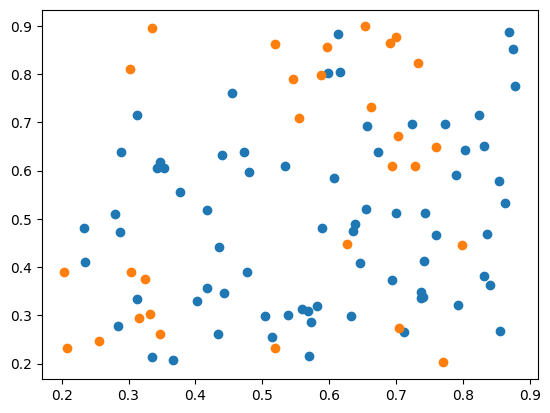

In [14]:
print(CCM_yx_15)
print(CCM_xy_15)
print(PCM_yx_15)
print(PCM_xy_15)

tr=[]
fa=[]

C=[1 if rate<=i else 0 for i in CCM_yx_15]
print(sum(C)/n)
c=[1 if rate<=i else 0 for i in CCM_xy_15]
print(sum(c)/n)
P=[1 if rate<=i else 0 for i in PCM_yx_15]
print(sum(P)/n)
p=[1 if rate<=i else 0 for i in PCM_xy_15]
print(sum(p)/n)

correct=0
for i in range(n):
    if C[i]==1 and c[i]==0 and P[i]==0 and p[i]==0:
        correct+=1
        tr.append([byz[i],bzx[i]])
    else:
        fa.append([byz[i],bzx[i]])
print(correct)
# print(tr)
tr=np.reshape(tr,(np.size(tr)//2,2))
fa=np.reshape(fa,(np.size(fa)//2,2))
plt.scatter(tr[:,0],tr[:,1])
plt.scatter(fa[:,0],fa[:,1])

In [15]:
L=20
m=20
t=time.time()
CCM_yx_20,CCM_xy_20,yx_sd_20,xy_sd_20,PCM_yx_20,PCM_xy_20,yx_sdd_20,xy_sdd_20=main(L,m,byx,byz,bzx,iteration)
print(time.time()-t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
12454.9400203228


[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.94, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 0.99, 1.0, 0.89, 1.0, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0]
[0.51, 0.24, 0.33, 0.32, 0.41, 0.33, 0.37, 0.37, 0.48, 0.32, 0.8, 0.31, 0.34, 0.33, 0.57, 0.33, 0.61, 0.59, 0.69, 0.34, 0.26, 0.33, 0.72, 0.38, 0.35, 0.34, 0.24, 0.58, 0.32, 0.58, 0.52, 0.36, 0.43, 0.3, 0.39, 0.41, 0.36, 0.51, 0.3, 0.38, 0.32, 0.59, 0.3, 0.37, 0.29, 0.36, 0.43, 0.3, 0.35, 0.28, 0.39, 0.33, 0.49, 0.27, 0.18, 0.41, 0.33, 0.35, 0.38, 0.67, 0.3, 0.34, 0.37, 0.4, 0.22, 0.45, 0.26, 0.51, 0.44, 0.33, 0.56, 0.39, 0.38, 0.65, 0.99, 0.33, 0.66, 0.43, 0.36, 0.31, 0.34, 

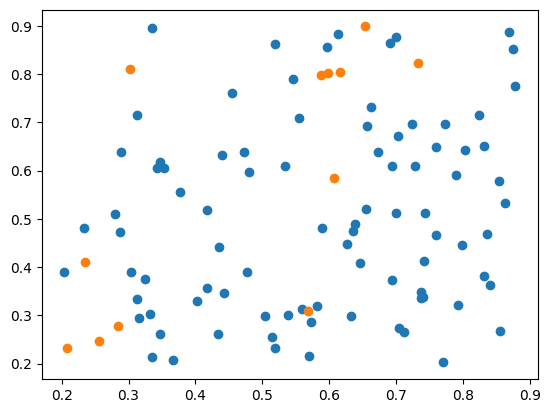

In [16]:
print(CCM_yx_20)
print(CCM_xy_20)
print(PCM_yx_20)
print(PCM_xy_20)

tr=[]
fa=[]

C=[1 if rate<=i else 0 for i in CCM_yx_20]
print(sum(C)/n)
c=[1 if rate<=i else 0 for i in CCM_xy_20]
print(sum(c)/n)
P=[1 if rate<=i else 0 for i in PCM_yx_20]
print(sum(P)/n)
p=[1 if rate<=i else 0 for i in PCM_xy_20]
print(sum(p)/n)

correct=0
for i in range(n):
    if C[i]==1 and c[i]==0 and P[i]==0 and p[i]==0:
        correct+=1
        tr.append([byz[i],bzx[i]])
    else:
        fa.append([byz[i],bzx[i]])
print(correct)
tr=np.reshape(tr,(np.size(tr)//2,2))
fa=np.reshape(fa,(np.size(fa)//2,2))
plt.scatter(tr[:,0],tr[:,1])
plt.scatter(fa[:,0],fa[:,1])

In [17]:
L=20
m=25
t=time.time()
CCM_yx_25,CCM_xy_25,yx_sd_25,xy_sd_25,PCM_yx_25,PCM_xy_25,yx_sdd_25,xy_sdd_25=main(L,m,byx,byz,bzx,iteration)
print(time.time()-t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
15359.587636947632


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.91, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.38, 0.57, 0.51, 0.52, 0.46, 0.72, 0.51, 0.55, 0.69, 0.32, 0.91, 0.44, 0.51, 0.83, 0.61, 0.54, 0.42, 0.99, 0.78, 0.71, 0.36, 0.36, 0.47, 0.38, 0.52, 0.46, 0.4, 0.6, 0.41, 0.55, 0.96, 0.56, 0.48, 0.37, 0.56, 0.47, 0.58, 0.51, 0.42, 0.36, 0.44, 0.75, 0.42, 0.38, 0.43, 0.48, 0.4, 0.56, 0.69, 0.44, 0.54, 0.72, 0.47, 0.48, 0.59, 0.36, 0.49, 0.35, 0.57, 0.65, 0.53, 0.5, 0.45, 0.54, 0.63, 0.39, 0.46, 0.6, 0.54, 0.48, 0.65, 0.64, 0.62, 0.63, 0.97, 0.41, 0.55, 0.72, 0.39, 0.46, 0.4, 0.39, 0.4

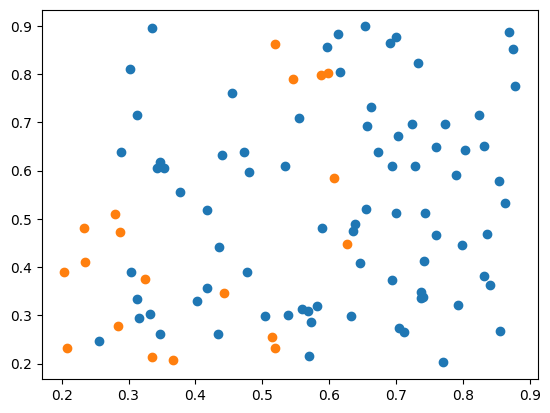

In [18]:
print(CCM_yx_25)
print(CCM_xy_25)
print(PCM_yx_25)
print(PCM_xy_25)

tr=[]
fa=[]

C=[1 if rate<=i else 0 for i in CCM_yx_25]
print(sum(C)/n)
c=[1 if rate<=i else 0 for i in CCM_xy_25]
print(sum(c)/n)
P=[1 if rate<=i else 0 for i in PCM_yx_25]
print(sum(P)/n)
p=[1 if rate<=i else 0 for i in PCM_xy_25]
print(sum(p)/n)

correct=0
for i in range(n):
    if C[i]==1 and c[i]==0 and P[i]==0 and p[i]==0:
        correct+=1
        tr.append([byz[i],bzx[i]])
    else:
        fa.append([byz[i],bzx[i]])
print(correct)
# print(tr)
tr=np.reshape(tr,(np.size(tr)//2,2))
fa=np.reshape(fa,(np.size(fa)//2,2))
plt.scatter(tr[:,0],tr[:,1])
plt.scatter(fa[:,0],fa[:,1])